Dijkstra Times: [1.9311904907226562e-05, 3.0279159545898438e-05, 5.4836273193359375e-05, 8.225440979003906e-05, 0.00010848045349121094]
Prim Times: [9.059906005859375e-06, 4.267692565917969e-05, 0.0001125335693359375, 0.00020551681518554688, 0.0006010532379150391]
Memory: [96.86328125, 96.86328125, 96.86328125, 96.8671875, 96.875]


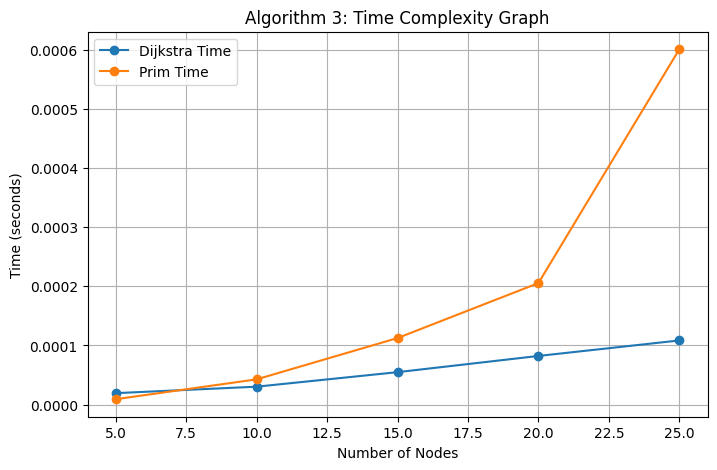

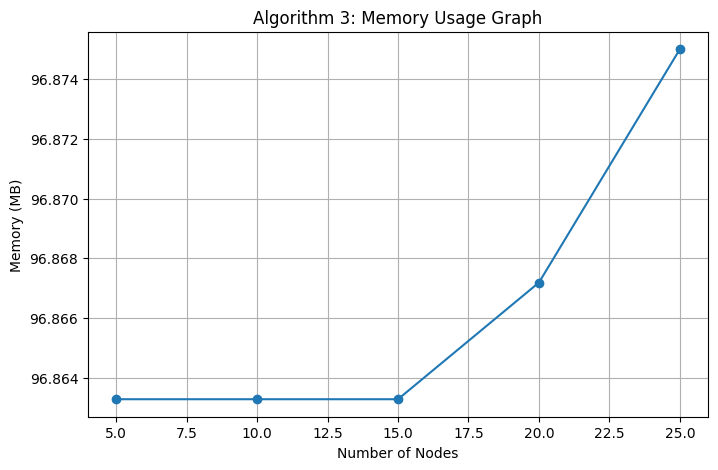

In [1]:

import heapq
import time
import psutil, os
import matplotlib.pyplot as plt
import random

# --------- Create Symmetric Distance Matrix (n x n) --------------
def create_graph(n):
    random.seed(10+n)
    mat = [[0]*n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            w = random.randint(1, 20)  # random weight
            mat[i][j] = w
            mat[j][i] = w
    return mat

# --------- Dijkstra Algorithm -----------------------------------
def dijkstra(graph, start):
    n = len(graph)
    dist = [float('inf')] * n
    dist[start] = 0
    visited = [False] * n

    pq = [(0, start)]
    while pq:
        d, u = heapq.heappop(pq)
        if visited[u]:
            continue
        visited[u] = True

        for v in range(n):
            w = graph[u][v]
            if w > 0 and not visited[v]:
                if d + w < dist[v]:
                    dist[v] = d + w
                    heapq.heappush(pq, (dist[v], v))

    return dist

# --------- Prim MST Algorithm -----------------------------------
def prim(graph):
    n = len(graph)
    visited = [False] * n
    pq = [(0, 0)]   # (weight, node)
    mst_cost = 0

    while pq:
        w, u = heapq.heappop(pq)
        if visited[u]:
            continue

        visited[u] = True
        mst_cost += w

        for v in range(n):
            if not visited[v] and graph[u][v] > 0:
                heapq.heappush(pq, (graph[u][v], v))

    return mst_cost

# --------- Test + Plotting ---------------------------------------
sizes = [5, 10, 15, 20, 25]
dijkstra_times = []
prim_times = []
memory_usage = []

for n in sizes:
    graph = create_graph(n)

    # ---- Time Dijkstra ----
    t1 = time.time()
    dijkstra(graph, 0)
    t2 = time.time()
    dijkstra_times.append(t2 - t1)

    # ---- Time Prim ----
    t1 = time.time()
    prim(graph)
    t2 = time.time()
    prim_times.append(t2 - t1)

    # ---- Memory ----
    mem = psutil.Process(os.getpid()).memory_info().rss / (1024*1024)
    memory_usage.append(mem)

print("Dijkstra Times:", dijkstra_times)
print("Prim Times:", prim_times)
print("Memory:", memory_usage)

# ------------------ Plot 1: Time Complexity ----------------------
plt.figure(figsize=(8,5))
plt.plot(sizes, dijkstra_times, marker='o', label="Dijkstra Time")
plt.plot(sizes, prim_times, marker='o', label="Prim Time")
plt.title("Algorithm 3: Time Complexity Graph")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Plot 2: Memory Usage -------------------------
plt.figure(figsize=(8,5))
plt.plot(sizes, memory_usage, marker='o')
plt.title("Algorithm 3: Memory Usage Graph")
plt.xlabel("Number of Nodes")
plt.ylabel("Memory (MB)")
plt.grid(True)
plt.show()
